In [1]:
#importing all the libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplib
import seaborn as sborn
import os
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

In [2]:
# reading the data

dataframe = pd.read_csv("Data.csv")
dataframe.info()
dataframe.head(20)
dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


There seem to be no missing data fields here, I think we can move on to the main part of the code: the modelling and creation

But before that, we need to figure out some stats for the information contained in the csv file, as well as convert the names of the months into numbers.

In [3]:
#printing value counts for each column
print(dataframe['Administrative'].value_counts())
print(dataframe["Administrative_Duration"].value_counts())
print(dataframe['Informational'].value_counts())
print(dataframe['Informational_Duration'].value_counts())
print(dataframe['ProductRelated'].value_counts())
print(dataframe['ProductRelated_Duration'].value_counts())
print(dataframe['BounceRates'].value_counts())
print(dataframe['ExitRates'].value_counts())
print(dataframe['PageValues'].value_counts())
print(dataframe['SpecialDay'].value_counts())
print(dataframe['Month'].value_counts())
print(dataframe['OperatingSystems'].value_counts())
print(dataframe['Browser'].value_counts())
print(dataframe['Region'].value_counts())
print(dataframe['TrafficType'].value_counts())
print(dataframe['VisitorType'].value_counts())
print(dataframe['Weekend'].value_counts())
print(dataframe['Revenue'].value_counts())

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64
0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64
0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64
0.00      9925
9.00        33
7.00        26
10.00       26
6.00        26
          ... 
246.80       1
274.00       1
13.40        1
223.15       1
211.25       1
Name: Informati

In [4]:
label_encode = {"Month": {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}, "VisitorType": {"New_Visitor": 0, "Returning_Visitor": 1, "Other": 2}, "Weekend": {True: 1, False: 0}, "Revenue": {True: 1, False: 0}}
dataframe_labelencoded = dataframe.copy()
dataframe_labelencoded.replace(label_encode, inplace = True, regex = True)
dataframe_labelencoded.info()
dataframe_labelencoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,1,1,0


In [5]:
y = dataframe_labelencoded["Revenue"]

No handles with labels found to put in legend.


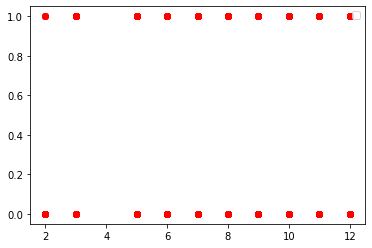

In [6]:
x = dataframe_labelencoded["Month"]
mplib.scatter(x, y, color = "Red")
mplib.legend()
mplib.show()

No handles with labels found to put in legend.


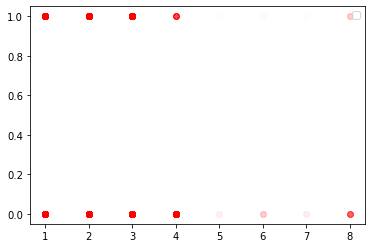

In [7]:
x = dataframe_labelencoded["OperatingSystems"]
mplib.scatter(x, y, color = "Red", alpha = 0.01)
mplib.legend()
mplib.show()

In [8]:
x_values = dataframe_labelencoded.drop(["Revenue"], axis = 1)
y_values = dataframe_labelencoded["Revenue"]
print(y_values) #Testing only, again
print(x_values)

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12330, dtype: int64
       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductR

In [9]:
#standardisation.....
Standardise = StandardScaler()
x_values_standardised = Standardise.fit_transform(x_values)
x_values_dataframe = pd.DataFrame(x_values_standardised)
x_values_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12330 non-null  float64
 1   1       12330 non-null  float64
 2   2       12330 non-null  float64
 3   3       12330 non-null  float64
 4   4       12330 non-null  float64
 5   5       12330 non-null  float64
 6   6       12330 non-null  float64
 7   7       12330 non-null  float64
 8   8       12330 non-null  float64
 9   9       12330 non-null  float64
 10  10      12330 non-null  float64
 11  11      12330 non-null  float64
 12  12      12330 non-null  float64
 13  13      12330 non-null  float64
 14  14      12330 non-null  float64
 15  15      12330 non-null  float64
 16  16      12330 non-null  float64
dtypes: float64(17)
memory usage: 1.6 MB


In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size = 0.3, random_state = 5)
print(x_train) #Testing
print(y_train) #Testing

       Administrative  Administrative_Duration  Informational  \
10350               5               613.500000              0   
11646               3                13.333333              4   
8865                0                 0.000000              0   
2683                0                 0.000000              0   
5634                5               148.500000              0   
...               ...                      ...            ...   
3046                0                 0.000000              0   
9917                0                 0.000000              0   
4079                0                 0.000000              0   
2254                3                77.000000              5   
2915                0                 0.000000              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
10350                     0.0             470               14129.8808   
11646                    68.5              72                1602.3500 

In [11]:
#Standardisation, yet again
x_train_scale = Standardise.fit_transform(x_train)
x_test_scale = Standardise.transform(x_test)
print(x_train_scale)
print("-------------GAP----------") #I'm human, I need to see some separation...
print(x_test_scale)

[[ 0.80656857  3.09142407 -0.39801287 ... -0.51672961  0.36483731
   1.80267322]
 [ 0.20287492 -0.38779636  2.73562367 ... -0.51672961  0.36483731
  -0.55473171]
 [-0.70266556 -0.46509089 -0.39801287 ... -0.26656732  0.36483731
  -0.55473171]
 ...
 [-0.70266556 -0.46509089 -0.39801287 ... -0.26656732  0.36483731
   1.80267322]
 [ 0.20287492 -0.01871493  3.5190328  ... -0.26656732  0.36483731
  -0.55473171]
 [-0.70266556 -0.46509089 -0.39801287 ... -0.7668919   0.36483731
  -0.55473171]]
-------------GAP----------
[[-0.70266556 -0.46509089 -0.39801287 ... -0.7668919   0.36483731
  -0.55473171]
 [-0.70266556 -0.46509089 -0.39801287 ... -0.7668919   0.36483731
   1.80267322]
 [-0.70266556 -0.46509089 -0.39801287 ...  1.4845687   0.36483731
  -0.55473171]
 ...
 [ 0.20287492  0.0218647  -0.39801287 ... -0.7668919   0.36483731
  -0.55473171]
 [ 1.1084154  -0.09939111 -0.39801287 ... -0.51672961  0.36483731
  -0.55473171]
 [-0.40081873 -0.44190253 -0.39801287 ... -0.7668919   0.36483731
  -0.

TensorFlow and Keras starts here!

In [12]:
model = Sequential()
model.add(Dense(17, activation = "relu", input_dim = 17))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
model.add(Dense(17, activation = "relu"))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
#Hidden layer 2
model.add(Dense(17, activation = "relu"))
#Output layer
model.add(Dense(2, activation = "softmax"))

#COmpilation
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
#Checking for correct compilation
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                306       
                                                                 
 dense_1 (Dense)             (None, 17)                306       
                                                                 
 dense_2 (Dense)             (None, 17)                306       
                                                                 
 dense_3 (Dense)             (None, 17)                306       
                                                                 
 dense_4 (Dense)             (None, 17)                306       
                                                                 
 dense_5 (Dense)             (None, 17)                306       
                                                                 
 dense_6 (Dense)             (None, 17)                3

In [14]:
#Had to do onehot encoding in any case....
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)
print(y_train_onehot)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [15]:
model.fit(x_train_scale, y_train_onehot, epochs=350, shuffle = True)

Epoch 1/350
270/270 [==============================] - 1s 718us/step - loss: 0.3532 - accuracy: 0.8612
Epoch 2/350
270/270 [==============================] - 0s 785us/step - loss: 0.2846 - accuracy: 0.8911
Epoch 3/350
270/270 [==============================] - 0s 759us/step - loss: 0.2715 - accuracy: 0.8938
Epoch 4/350
270/270 [==============================] - 0s 788us/step - loss: 0.2643 - accuracy: 0.8954
Epoch 5/350
270/270 [==============================] - 0s 781us/step - loss: 0.2588 - accuracy: 0.8967
Epoch 6/350
270/270 [==============================] - 0s 777us/step - loss: 0.2548 - accuracy: 0.8973
Epoch 7/350
270/270 [==============================] - 0s 762us/step - loss: 0.2509 - accuracy: 0.8994
Epoch 8/350
270/270 [==============================] - 0s 785us/step - loss: 0.2476 - accuracy: 0.8998
Epoch 9/350
270/270 [==============================] - 0s 803us/step - loss: 0.2449 - accuracy: 0.9000
Epoch 10/350
270/270 [==============================] - 0s 811us/step - l

270/270 [==============================] - 0s 811us/step - loss: 0.2100 - accuracy: 0.9136
Epoch 80/350
270/270 [==============================] - 0s 755us/step - loss: 0.2094 - accuracy: 0.9122
Epoch 81/350
270/270 [==============================] - 0s 770us/step - loss: 0.2084 - accuracy: 0.9129
Epoch 82/350
270/270 [==============================] - 0s 792us/step - loss: 0.2073 - accuracy: 0.9151
Epoch 83/350
270/270 [==============================] - 0s 818us/step - loss: 0.2073 - accuracy: 0.9144
Epoch 84/350
270/270 [==============================] - 0s 792us/step - loss: 0.2073 - accuracy: 0.9145
Epoch 85/350
270/270 [==============================] - 0s 773us/step - loss: 0.2087 - accuracy: 0.9155
Epoch 86/350
270/270 [==============================] - 0s 785us/step - loss: 0.2060 - accuracy: 0.9160
Epoch 87/350
270/270 [==============================] - 0s 777us/step - loss: 0.2060 - accuracy: 0.9146
Epoch 88/350
270/270 [==============================] - 0s 963us/step - loss:

270/270 [==============================] - 0s 796us/step - loss: 0.1987 - accuracy: 0.9218
Epoch 158/350
270/270 [==============================] - 0s 703us/step - loss: 0.1967 - accuracy: 0.9240
Epoch 159/350
270/270 [==============================] - 0s 721us/step - loss: 0.1963 - accuracy: 0.9245
Epoch 160/350
270/270 [==============================] - 0s 814us/step - loss: 0.2012 - accuracy: 0.9226
Epoch 161/350
270/270 [==============================] - 0s 725us/step - loss: 0.2013 - accuracy: 0.9213
Epoch 162/350
270/270 [==============================] - 0s 762us/step - loss: 0.2010 - accuracy: 0.9264
Epoch 163/350
270/270 [==============================] - 0s 785us/step - loss: 0.1998 - accuracy: 0.9223
Epoch 164/350
270/270 [==============================] - 0s 807us/step - loss: 0.2009 - accuracy: 0.9241
Epoch 165/350
270/270 [==============================] - 0s 807us/step - loss: 0.2012 - accuracy: 0.9227
Epoch 166/350
270/270 [==============================] - 0s 807us/ste

270/270 [==============================] - 0s 785us/step - loss: 0.1993 - accuracy: 0.9213
Epoch 236/350
270/270 [==============================] - 0s 803us/step - loss: 0.2064 - accuracy: 0.9225
Epoch 237/350
270/270 [==============================] - 0s 785us/step - loss: 0.2006 - accuracy: 0.9223
Epoch 238/350
270/270 [==============================] - 0s 837us/step - loss: 0.2045 - accuracy: 0.9217
Epoch 239/350
270/270 [==============================] - 0s 822us/step - loss: 0.2064 - accuracy: 0.9223
Epoch 240/350
270/270 [==============================] - 0s 799us/step - loss: 0.2077 - accuracy: 0.9217
Epoch 241/350
270/270 [==============================] - 0s 829us/step - loss: 0.2060 - accuracy: 0.9195
Epoch 242/350
270/270 [==============================] - 0s 796us/step - loss: 0.2091 - accuracy: 0.9174
Epoch 243/350
270/270 [==============================] - 0s 792us/step - loss: 0.2015 - accuracy: 0.9208
Epoch 244/350
270/270 [==============================] - 0s 814us/ste

270/270 [==============================] - 0s 759us/step - loss: 0.2253 - accuracy: 0.9133
Epoch 314/350
270/270 [==============================] - 0s 759us/step - loss: 0.2253 - accuracy: 0.9145
Epoch 315/350
270/270 [==============================] - 0s 770us/step - loss: 0.2232 - accuracy: 0.9180
Epoch 316/350
270/270 [==============================] - 0s 781us/step - loss: 0.2313 - accuracy: 0.9168
Epoch 317/350
270/270 [==============================] - 0s 770us/step - loss: 0.2234 - accuracy: 0.9184
Epoch 318/350
270/270 [==============================] - 0s 766us/step - loss: 0.2213 - accuracy: 0.9169
Epoch 319/350
270/270 [==============================] - 0s 766us/step - loss: 0.2258 - accuracy: 0.9136
Epoch 320/350
270/270 [==============================] - 0s 755us/step - loss: 0.2298 - accuracy: 0.9162
Epoch 321/350
270/270 [==============================] - 0s 747us/step - loss: 0.2469 - accuracy: 0.9180
Epoch 322/350
270/270 [==============================] - 0s 792us/ste

Now we are done with the code section, let's move on to the model export

In [16]:
#imports for the model save
import os
from tensorflow import saved_model as SaveModel

In [17]:
#actually saving the model and defining the path
model.save("finalfinal")

INFO:tensorflow:Assets written to: finalfinal\assets


This marks the end of the main model code